<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Shopping_Intentions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
shop = pd.read_csv("/content/online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Out target column is: Revenue - A boolean representing whether or not the user completed the purchase.

In [ ]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
shop.shape

(12330, 18)

In [ ]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<ipython-input-11-abc98a87977a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shop.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

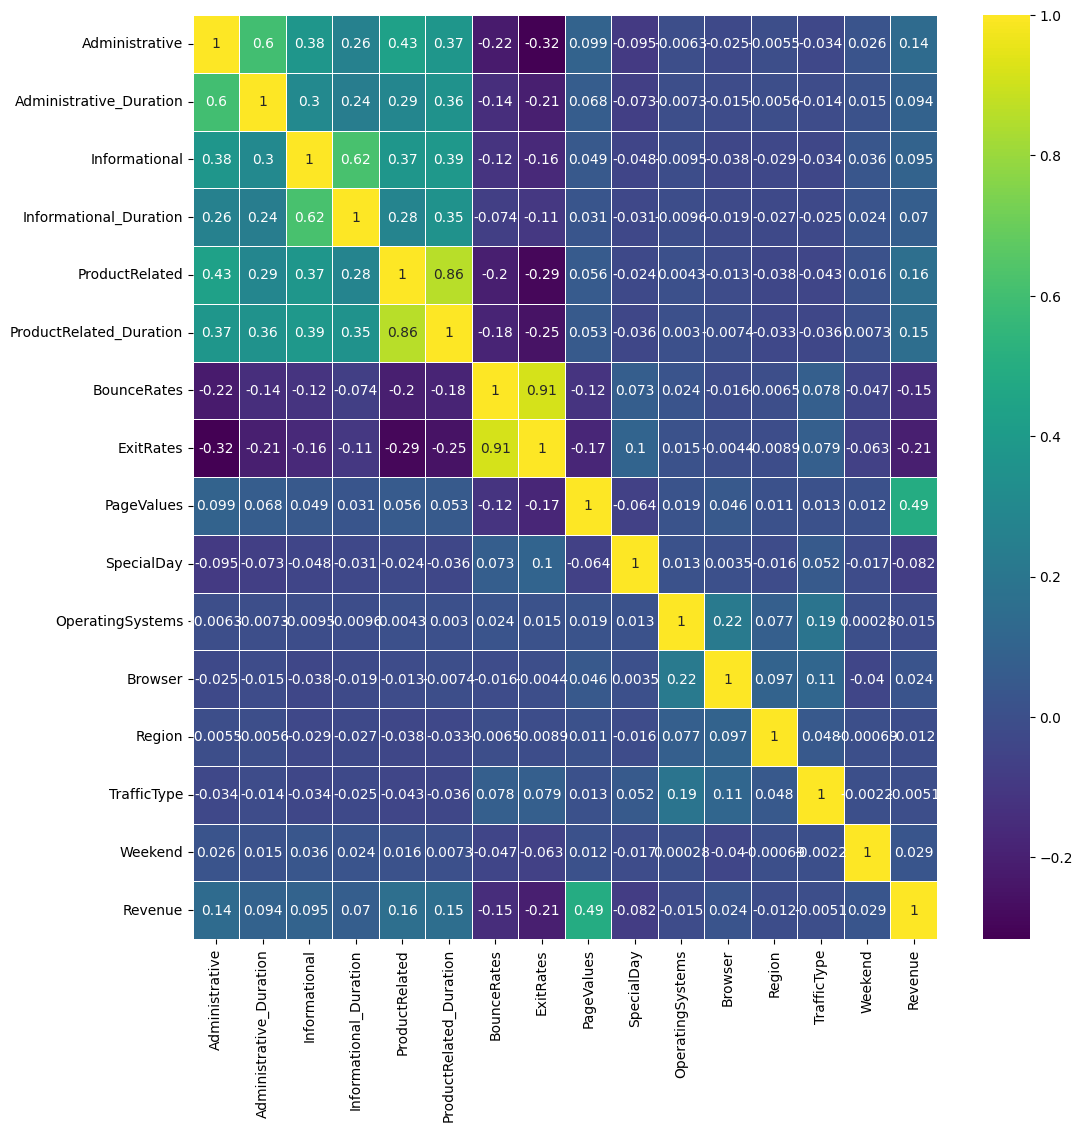

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(shop.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
shope = shop.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [ ]:
# Finding about categorical data

In [ ]:
shope.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


[]

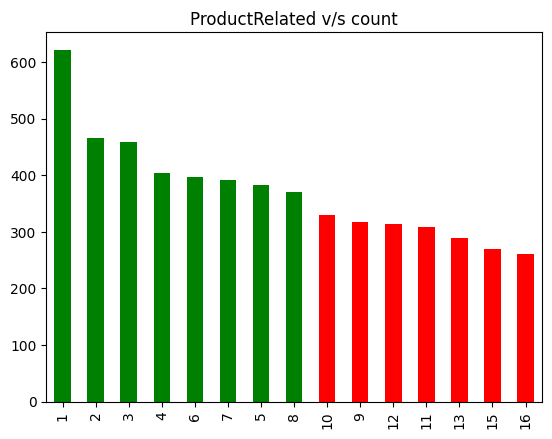

In [ ]:
shope['ProductRelated'].value_counts().head(15).plot.bar(color = ['Green' if i > 350 else 'Red' for i in shope['ProductRelated'].value_counts().head(15).values]) # a categorical type but the data is too spread (ranges from 1 too 399)
plt.xticks(rotation = 90)
plt.title('ProductRelated v/s count')
plt.plot()

<Axes: >

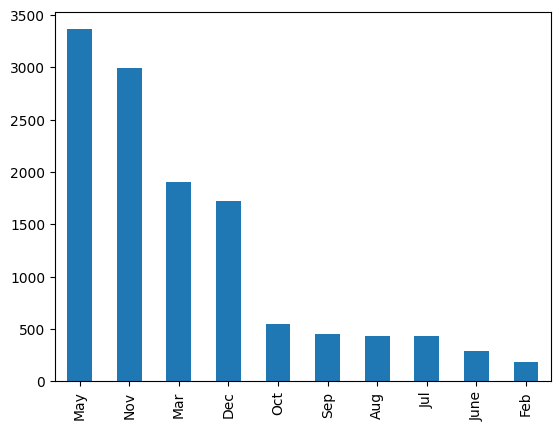

In [ ]:
shope['Month'].value_counts().plot.bar()

Text(0.5, 1.0, 'Operating Systems vs counts')

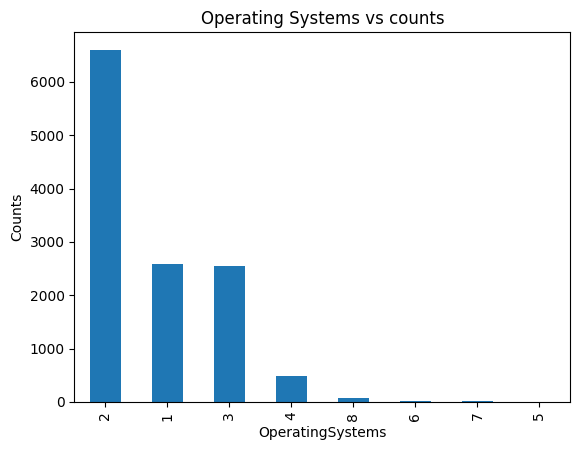

In [ ]:
shope['OperatingSystems'].value_counts().plot.bar()
plt.xlabel('OperatingSystems')
plt.ylabel('Counts')
plt.title('Operating Systems vs counts')

<Axes: ylabel='VisitorType'>

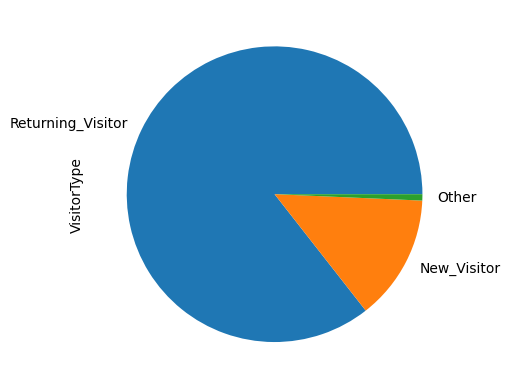

In [ ]:
shope['VisitorType'].value_counts().plot.pie()

In [ ]:
shope['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [ ]:
shope['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [ ]:
visitor = pd.get_dummies(shope['VisitorType'])

X = pd.concat([shope, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [ ]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [ ]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [ ]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [ ]:
# The above code converts the boolean values to float type - actaully it converts all the data into float type. This has been done so that
# the sequential model is able to build tensors out of them
y.shape

(12330,)

In [ ]:
X_new.shape

(12330, 15)

In [ ]:
model = Sequential()
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=16,activation="relu"))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
"""
In the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns
in our X (Sepal Length, Sepal Width, Petal Length, Petal Width).

After this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.
The last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation
function as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along
with “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.
"""

'\nIn the above code, we have started with creating a Sequential Keras model with the first layer as dense having 4 inputs for the 4 columns\nin our X (Sepal Length, Sepal Width, Petal Length, Petal Width).\n\nAfter this, we have added 2 hidden layers and using “relu” as the activation function for all the layers except the last one.\nThe last layer contains 2 units for 2 respective classes of Revenue (False, True) with “softmax” activation\nfunction as we are dealing with Multi-Class classification problem, also while compiling the model we are using “adam” optimizer along\nwith “accuracy” as metrics to maximize the same and minimizing our defined loss “categorical_crossentropy” with each epoch.\n'

In [ ]:
history = model.fit(X_new,y,epochs=40, validation_split=0.1)

Epoch 1/40
347/347 [==============================] - 3s 4ms/step - loss: 0.5018 - accuracy: 0.8632 - val_loss: 0.6753 - val_accuracy: 0.8281
Epoch 2/40
347/347 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8828 - val_loss: 0.6157 - val_accuracy: 0.8248
Epoch 3/40
347/347 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8865 - val_loss: 0.4226 - val_accuracy: 0.8345
Epoch 4/40
347/347 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.8887 - val_loss: 0.3986 - val_accuracy: 0.8321
Epoch 5/40
347/347 [==============================] - 1s 2ms/step - loss: 0.3073 - accuracy: 0.8896 - val_loss: 0.4521 - val_accuracy: 0.8370
Epoch 6/40
347/347 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8901 - val_loss: 0.4875 - val_accuracy: 0.8273
Epoch 7/40
347/347 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.8943 - val_loss: 0.5409 - val_accuracy: 0.8248
Epoch 

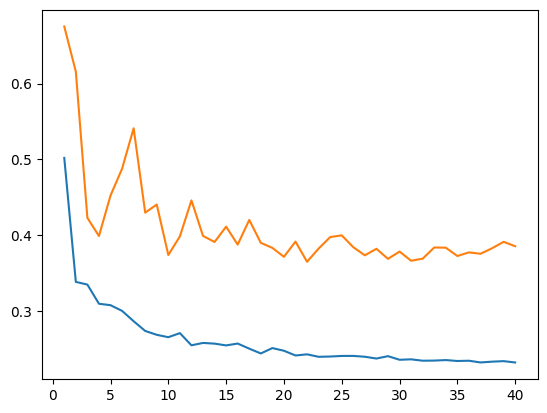

In [ ]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')